### Q4 Raman spectrum

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.interpolate import splev, splrep

In [4]:
#read raw data
raman=pd.read_table('raman.txt',header=None)
raman_array=raman.to_numpy()
dis=60  #hei=0
peaks,_=find_peaks(raman_array[:,1],distance=dis)
raman_peak_list=[]
for i in peaks:
    raman_peak_list.append(raman_array[i])
raman_peak_array=np.array(raman_peak_list)
#print(raman_peak_array)


#spline
spl=splrep(raman_peak_array[:,0],raman_peak_array[:,1])
#spl=splrep(raman_peak_array[:,0],raman_peak_array[:,1])
x=np.linspace(500,3500,30000)
y=splev(x,spl)
dy=splev(x,spl,der=1)


#find maximum
raman_max_wavenumber=[]
raman_max_intensity=[]
#threshold_max=1.5  #and abs(dy[i])<threshold_max 
threshold_min=0.07
prior_i=0
for i in range(1,len(dy)-1):
    if abs(dy[i])>threshold_min and dy[i-1]>0 and dy[i+1]<0:
        #print(i)
        #Take the smaller derivative of two adjacent points
        if i==prior_i+1:
            #print("next")
            if abs(dy[i])>abs(dy[prior_i]):
                continue
            else:
                raman_max_wavenumber.pop()
                raman_max_intensity.pop()
                raman_max_wavenumber.append(x[i])
                raman_max_intensity.append(y[i])
                continue
        raman_max_wavenumber.append(x[i])
        raman_max_intensity.append(y[i])
        prior_i=i

### (a) Print the wavenumber estimates for the eight largest spectral peak to STDOUT sorted by magnitude.

In [34]:
raman_peak_sortU=np.argsort(raman_max_intensity)
raman_peak_sortD=raman_peak_sortU[::-1]
raman_top8max_wavenumber=[]
raman_top8max_intensity=[]
print("The eight largest spectral peak:")
for i in range(8): 
    raman_top8max_wavenumber.append(raman_max_wavenumber[raman_peak_sortD[i]])
    raman_top8max_intensity.append(raman_max_intensity[raman_peak_sortD[i]])
    print("No",i+1,": wavenumber:",round(raman_top8max_wavenumber[i],5),' intensity:',round(raman_top8max_intensity[i],5))

The eight largest spectral peak:
No 1 : wavenumber: 751.70839  intensity: 15300.54001
No 2 : wavenumber: 1253.52512  intensity: 5279.87529
No 3 : wavenumber: 2967.28224  intensity: 5096.37
No 4 : wavenumber: 2895.57985  intensity: 4024.9314
No 5 : wavenumber: 1030.31768  intensity: 3374.3658
No 6 : wavenumber: 1423.73079  intensity: 3265.08494
No 7 : wavenumber: 1145.72152  intensity: 2841.61916
No 8 : wavenumber: 1347.92826  intensity: 1946.51166


### (b) Create a figure that shows the Raman data and mark each of the maximum intensity values

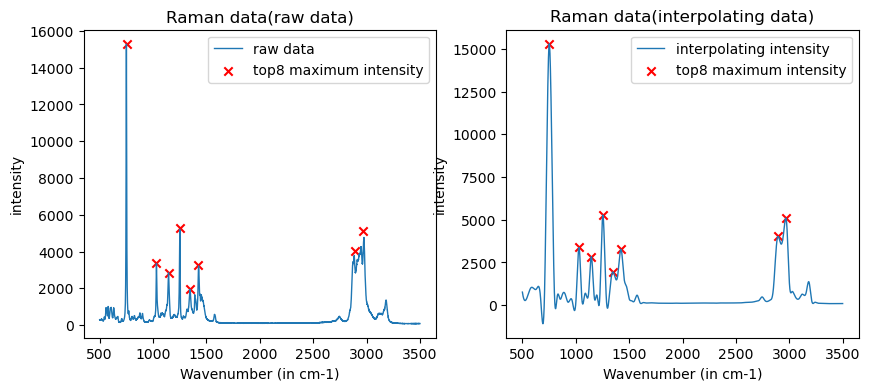

In [21]:
plt.figure(figsize=(10,4))
#raw data
plt.subplot(1, 2, 1)
plt.plot(raman_array[:,0],raman_array[:,1],linewidth=1)
plt.scatter(raman_top8max_wavenumber,raman_top8max_intensity,marker='x',color='red')
plt.xlabel("Wavenumber (in cm-1)")
plt.ylabel("intensity")
plt.title("Raman data(raw data)")
plt.legend(['raw data','top8 maximum intensity'])

#interpolating data
plt.subplot(1, 2, 2)
plt.plot(x,y,linewidth=1)
plt.scatter(raman_top8max_wavenumber,raman_top8max_intensity,marker='x',color='red')
plt.xlabel("Wavenumber (in cm-1)")
plt.ylabel("intensity")
plt.title("Raman data(interpolating data)")
plt.legend(['interpolating intensity','top8 maximum intensity'])

plt.show()

### (c) Produce a “zoomed-in” figure for the “regions of interest” corresponding to the four largest peaks. Plot the raw spectral data and overlay your interpolating function. Use a marker to show the wavenumber with maximal intensity

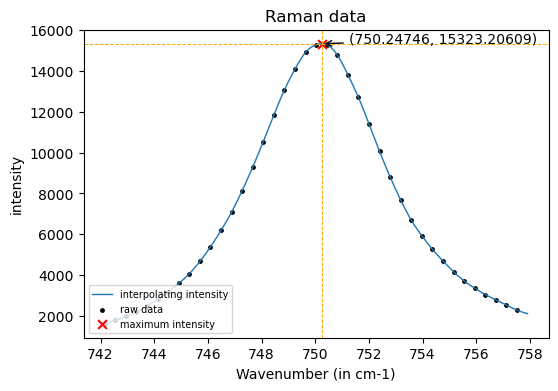

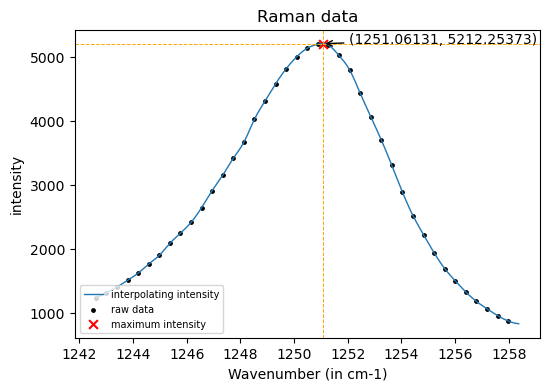

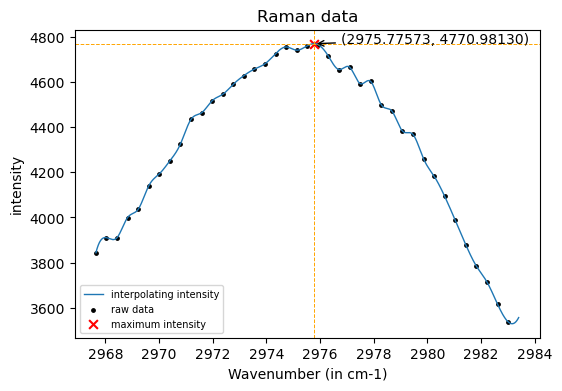

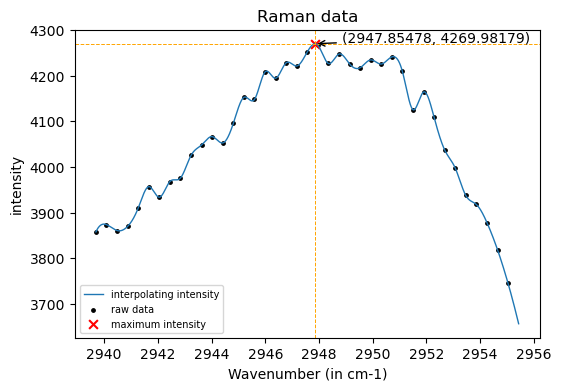

In [45]:
#detect top peaks
dis=60  
hei=2000
peaks,_=find_peaks(raman_array[:,1],distance=dis,height=hei)
raman_peak_list=[]
raman_peak_index=[]
for i in peaks:
    raman_peak_list.append(raman_array[i])
    raman_peak_index.append(i)
raman_peak_array=np.array(raman_peak_list)
#print(raman_peak_array)

peak_sortU=np.argsort(raman_peak_array[:,1])
peak_sortD=peak_sortU[::-1]

#interpolate intensity within each region of interest
for i in range(4):
    w=20
    l_range=raman_peak_index[peak_sortD[i]]-1-w
    r_range=raman_peak_index[peak_sortD[i]]-1+w
    #print(raman_peak_index[peak_sortD[i]],l_range,r_range)
    #spline
    spl=splrep(raman_array[l_range:r_range,0],raman_array[l_range:r_range,1])
    x=np.linspace(raman_array[l_range,0],raman_array[r_range,0],200*w)
    y=splev(x,spl)
    dy=splev(x,spl,der=1)

    #find maximum
    max_wavenumber=[]
    max_intensity=[]
    #threshold_max=1.5  #and abs(dy[i])<threshold_max 
    threshold_min=0.07
    prior_i=0
    for i in range(1,len(dy)-1):
        if abs(dy[i])>threshold_min and dy[i-1]>0 and dy[i+1]<0:
            #print(i)
            #Take the smaller derivative of two adjacent points
            if i==prior_i+1:
                #print("next")
                if abs(dy[i])>abs(dy[prior_i]):
                    continue
                else:
                    max_wavenumber.pop()
                    max_intensity.pop()
                    max_wavenumber.append(x[i])
                    max_intensity.append(y[i])
                    continue
            max_wavenumber.append(x[i])
            max_intensity.append(y[i])
            prior_i=i
            
    top1max_index=np.argmax(max_intensity)
    top1max_x=max_wavenumber[top1max_index]
    top1max_y=max_intensity[top1max_index]
    
    plt.figure(figsize=(6,4))
    plt.plot(x,y,linewidth=1)
    plt.scatter(raman_array[l_range:r_range,0],raman_array[l_range:r_range,1],marker='o',color='black',s=6)
    plt.scatter(top1max_x,top1max_y,marker='x',color='red',s=40)
    plt.axhline(y=top1max_y,color='orange',linestyle='--',linewidth=0.7)
    plt.axvline(x=top1max_x,color='orange',linestyle='--',linewidth=0.7)
    plt.annotate(f'({top1max_x:.5f}, {top1max_y:.5f})', 
             xy=(top1max_x, top1max_y), 
             xytext=(top1max_x + 1, top1max_y + 2),
             arrowprops=dict(facecolor='gray', arrowstyle='->'))
    plt.xlabel("Wavenumber (in cm-1)")
    plt.ylabel("intensity")
    plt.title("Raman data")
    plt.legend(['interpolating intensity', 'raw data','maximum intensity'],fontsize=7,loc='lower left')
    plt.show()